In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (20, 11)

### EDA

In [2]:
columns = ["blink_count", "BLINK_FRAME_FREQ", "amplitude", "duration", "velocity", "MAR", "EAR"]

In [3]:
df_0 = np.loadtxt("./data/p1/0_check.txt")
df_5 = np.loadtxt("./data/p1/5_check.txt")
df_10 = np.loadtxt("./data/p1/10_check.txt")

In [4]:
df_0 = pd.DataFrame(df_0)
df_0.columns = columns
df_0["MOEAR"] = df_0["MAR"] / df_0["EAR"]
df_0["class"] = pd.Series([0] * df_0.shape[0])
print(df_0.shape)

df_5 = pd.DataFrame(df_5)
df_5.columns = columns
df_5["MOEAR"] = df_5["MAR"] / df_5["EAR"]
df_5["class"] = pd.Series([1] * df_5.shape[0])
print(df_5.shape)

df_10 = pd.DataFrame(df_10)
df_10.columns = columns
df_10["MOEAR"] = df_10["MAR"] / df_10["EAR"]
df_10["class"] = pd.Series([2] * df_10.shape[0])
print(df_10.shape)

(217, 9)
(170, 9)
(184, 9)


In [5]:
data = pd.concat([df_0, df_5, df_10])
data = data.drop(columns=["BLINK_FRAME_FREQ"])

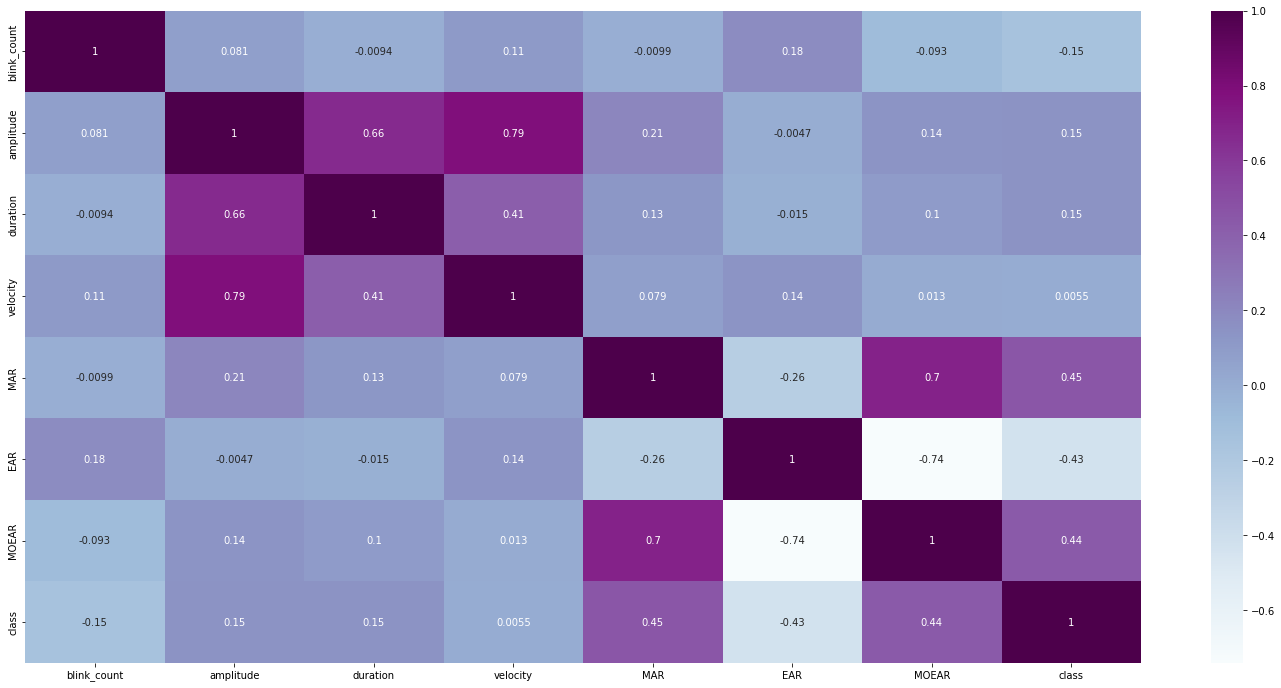

In [6]:
plt.figure(figsize=(25,12))
plt.title("")
sns.heatmap(data.corr(), annot=True, cmap="BuPu");

### Amplitude v/s frame count

In [7]:
df_0

,blink_count,BLINK_FRAME_FREQ,amplitude,duration,velocity,MAR,EAR,MOEAR,class
0,1.0,1.8868,0.1809,13.0,0.0238,2.2528,0.3348,6.728793,0
1,2.0,1.9048,0.1482,10.0,0.0238,2.2162,0.1708,12.975410,0
2,3.0,2.5210,0.1440,12.0,0.0167,1.8411,0.3123,5.895293,0
3,4.0,1.4337,0.0881,8.0,0.0171,1.9019,0.3282,5.794942,0
4,5.0,1.6077,0.0947,9.0,0.0166,1.7778,0.3224,5.514268,0
...,...,...,...,...,...,...,...,...,...
212,218.0,1.2606,0.0661,8.0,0.0162,2.3044,0.3471,6.639009,0
213,219.0,1.2514,0.1465,11.0,0.0187,2.2069,0.3608,6.116685,0
214,220.0,1.2472,0.1295,11.0,0.0146,2.2910,0.3120,7.342949,0
215,221.0,1.2298,0.1358,10.0,0.0219,1.8867,0.2483,7.598470,0


In [8]:
fig = px.line(df_0, x = "blink_count", y = "amplitude")
fig.show()

### MOEAR for all the states

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,
subplot_titles=("Alert", "S. Drowsy", "Drowsy")
)

fig.append_trace(
    go.Line(x = df_0["blink_count"], y = df_0["MOEAR"]),
    row=1, col=1
)

fig.append_trace(
    go.Line(x = df_5["blink_count"], y = df_5["MOEAR"]),
    row=2, col=1
)

fig.append_trace(
    go.Line(x = df_10["blink_count"], y = df_10["MOEAR"]),
    row=3, col=1
)

fig.update_layout(height=800, width=1550, title_text="MOEAR for (Alert, Slightly Dowsy and Drowsy) states.")
fig.show()

/home/anshal/anaconda3/envs/tf/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Duration for all 3 states

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,
subplot_titles=("Alert", "S. Drowsy", "Drowsy")
)

fig.append_trace(
    go.Line(x = df_0["blink_count"], y = df_0["duration"]),
    row=1, col=1
)

fig.append_trace(
    go.Line(x = df_5["blink_count"], y = df_5["duration"]),
    row=2, col=1
)

fig.append_trace(
    go.Line(x = df_10["blink_count"], y = df_10["duration"]),
    row=3, col=1
)

fig.update_layout(height=800, width=1550, title_text="duration for (Alert, Slightly Dowsy and Drowsy) states.")
fig.show()

In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(
    go.Scatter(x = df_0["blink_count"][:len(df_5["blink_count"])], y = df_0["duration"], name="duration_alert", mode="lines"))

fig.add_trace(
    go.Scatter(x = df_5["blink_count"], y = df_5["duration"], name="duration_s_drowsy", mode="lines"))

fig.add_trace(
    go.Scatter(x = df_10["blink_count"][:len(df_5["blink_count"])], y = df_10["duration"], name="duration_drowsy", mode="lines"))

fig.update_layout(height=800, width=1550, title_text="duration for (Alert, Slightly Dowsy and Drowsy) states.")
fig.show()

### VELOCITY V/S BLINK COUNT

In [12]:
df_0 = df_0[:30]
df_5 = df_5[:30]
df_10 = df_10[:30]

In [13]:
mean_0 = [df_0["velocity"].mean()] * df_0.shape[0]
mean_5 = [df_5["velocity"].mean()] * df_5.shape[0]
mean_10 = [df_10["velocity"].mean()] * df_10.shape[0]


In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=df_0["velocity"], x=df_0["blink_count"], name="blink_count_alert", mode="lines"))
fig.add_trace(go.Scatter(y=mean_0, x=df_0["blink_count"], name="mean_vel_alert", mode="lines"))

fig.add_trace(go.Scatter(y=df_5["velocity"], x=df_5["blink_count"], name="blink_count_s_drowsy", mode="lines"))
fig.add_trace(go.Scatter(y=mean_5, x=df_5["blink_count"], name="mean_vel_s_drowsy", mode="lines"))

fig.add_trace(go.Scatter(y=df_10["velocity"], x=df_10["blink_count"], name="blink_count_drowsy", mode="lines"))
fig.add_trace(go.Scatter(y=mean_10, x=df_10["blink_count"], name="mean_vel_drowsy", mode="lines"))

fig.update_layout(height=800, width=1600,
    title="Velocity v/s blink count for all the states.", xaxis_title="Date", yaxis_title="blink_count"
)
fig.show()